In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import img_as_ubyte
from skimage.filters.rank import mean

Gaussian Denoise 3x3 PNSR:20.94
Gaussian Denoise 5x5 PNSR:21.13
Gaussian Denoise Weighted Average PNSR:20.94


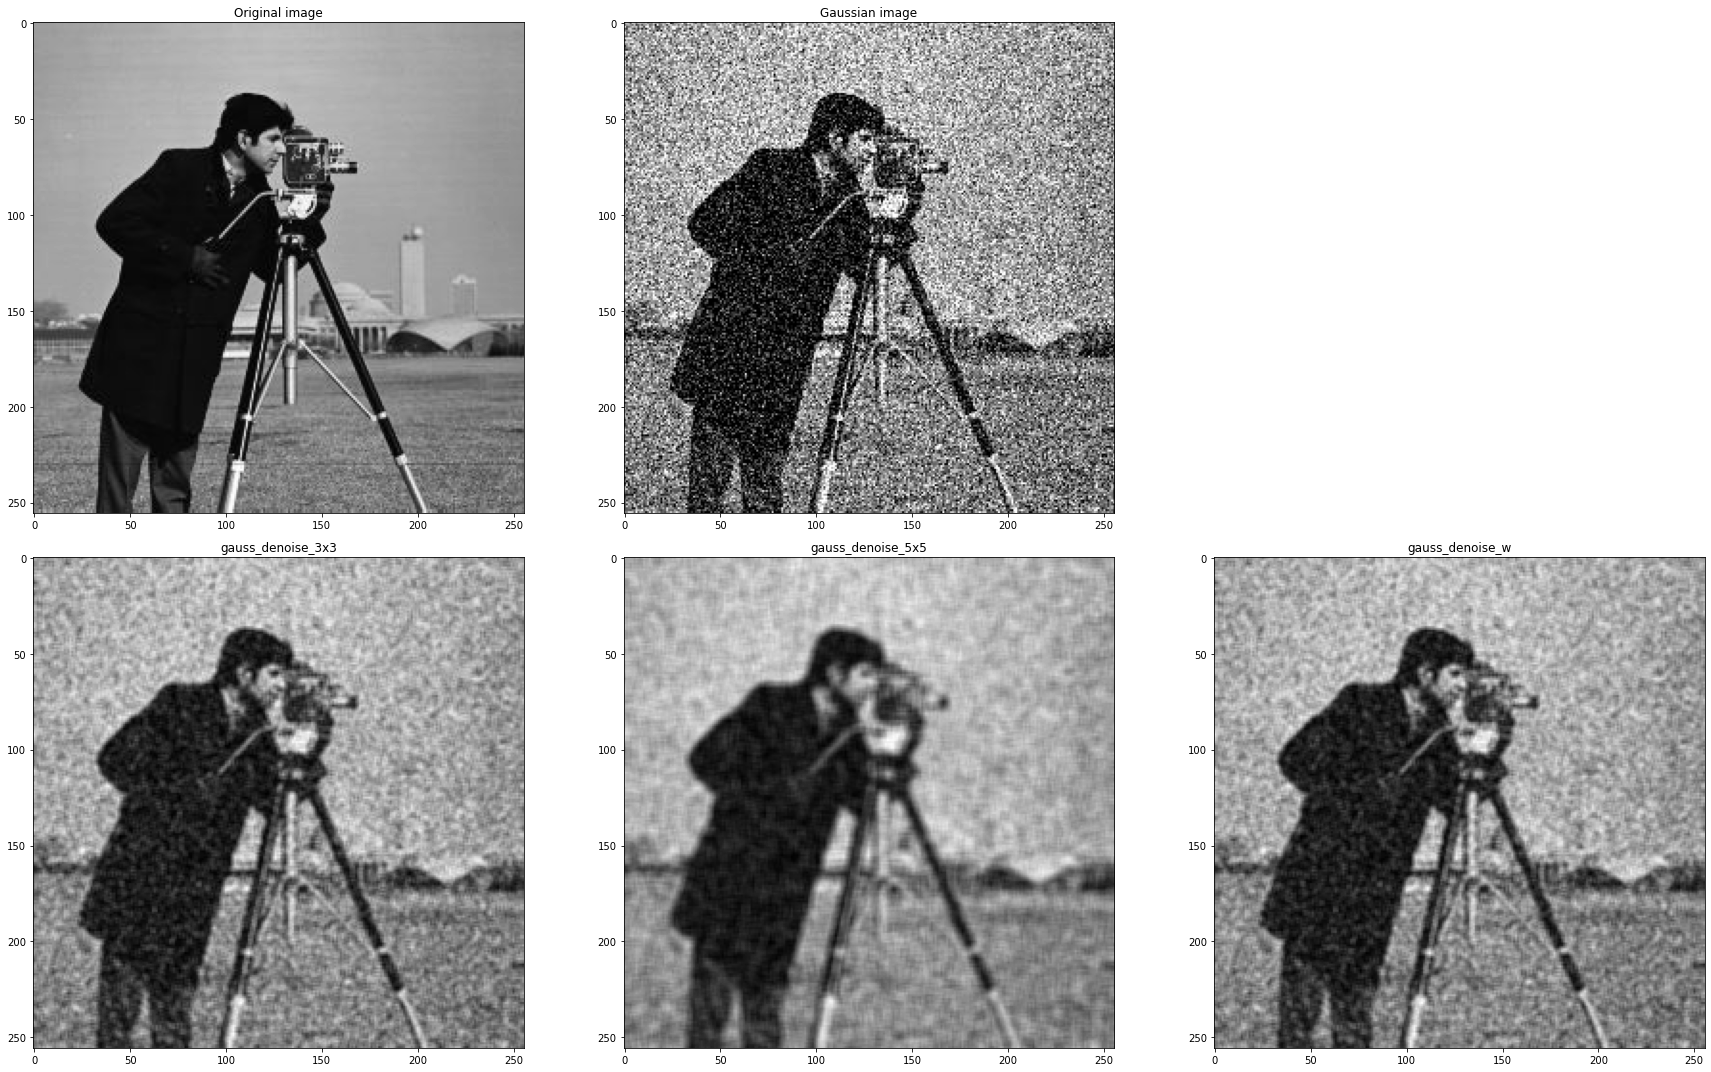

In [2]:
image = img_as_ubyte(imread(os.path.join(os.getcwd(),'../cameraman.jpg'), as_gray=True))

gaussian_image = img_as_ubyte(random_noise(image, mode='gaussian', seed=1, var=0.05, mean=0))
sp_image = img_as_ubyte(random_noise(image, mode="s&p", amount=0.1, salt_vs_pepper=0.5))

box_filter_3x3 = (1 / 9) * np.ones((3, 3))
box_filter_5x5 = (1 / 25) * np.ones((5, 5))
weighted_avg = (1 / 16) * np.array([[1, 2, 1], 
                                    [2, 4, 2], 
                                    [1, 2, 1]])

gauss_denoise_3x3 = mean(gaussian_image, box_filter_3x3)
gauss_denoise_5x5 = mean(gaussian_image, box_filter_5x5)
gauss_denoise_w = mean(gaussian_image, weighted_avg)

g_d_3x3_PSNR = peak_signal_noise_ratio(image_true=image,image_test=gauss_denoise_3x3)
g_d_5x5_PSNR = peak_signal_noise_ratio(image_true=image,image_test=gauss_denoise_5x5)
g_d_w_PSNR = peak_signal_noise_ratio(image_true=image,image_test=gauss_denoise_w)

print(f"Gaussian Denoise 3x3 PNSR:{g_d_3x3_PSNR:.2f}")
print(f"Gaussian Denoise 5x5 PNSR:{g_d_5x5_PSNR:.2f}")
print(f"Gaussian Denoise Weighted Average PNSR:{g_d_w_PSNR:.2f}")

plt.figure(figsize=(25,15))
plt.subplot(2,3,1), plt.imshow(image, cmap="gray"), plt.title("Original image")
plt.subplot(2,3,2), plt.imshow(gaussian_image, cmap="gray"), plt.title("Gaussian image")
plt.subplot(2,3,4), plt.imshow(gauss_denoise_3x3, cmap="gray"), plt.title("gauss_denoise_3x3")
plt.subplot(2,3,5), plt.imshow(gauss_denoise_5x5, cmap="gray"), plt.title("gauss_denoise_5x5")
plt.subplot(2,3,6), plt.imshow(gauss_denoise_w, cmap="gray"), plt.title("gauss_denoise_w")
plt.tight_layout()
plt.savefig('2-result-g.jpg')
plt.show()


Salt & Pepper Denoise 3x3 PNSR:21.81
Salt & Pepper Denoise 5x5 PNSR:21.59
Salt & Pepper Denoise Weighted Average PNSR:21.81


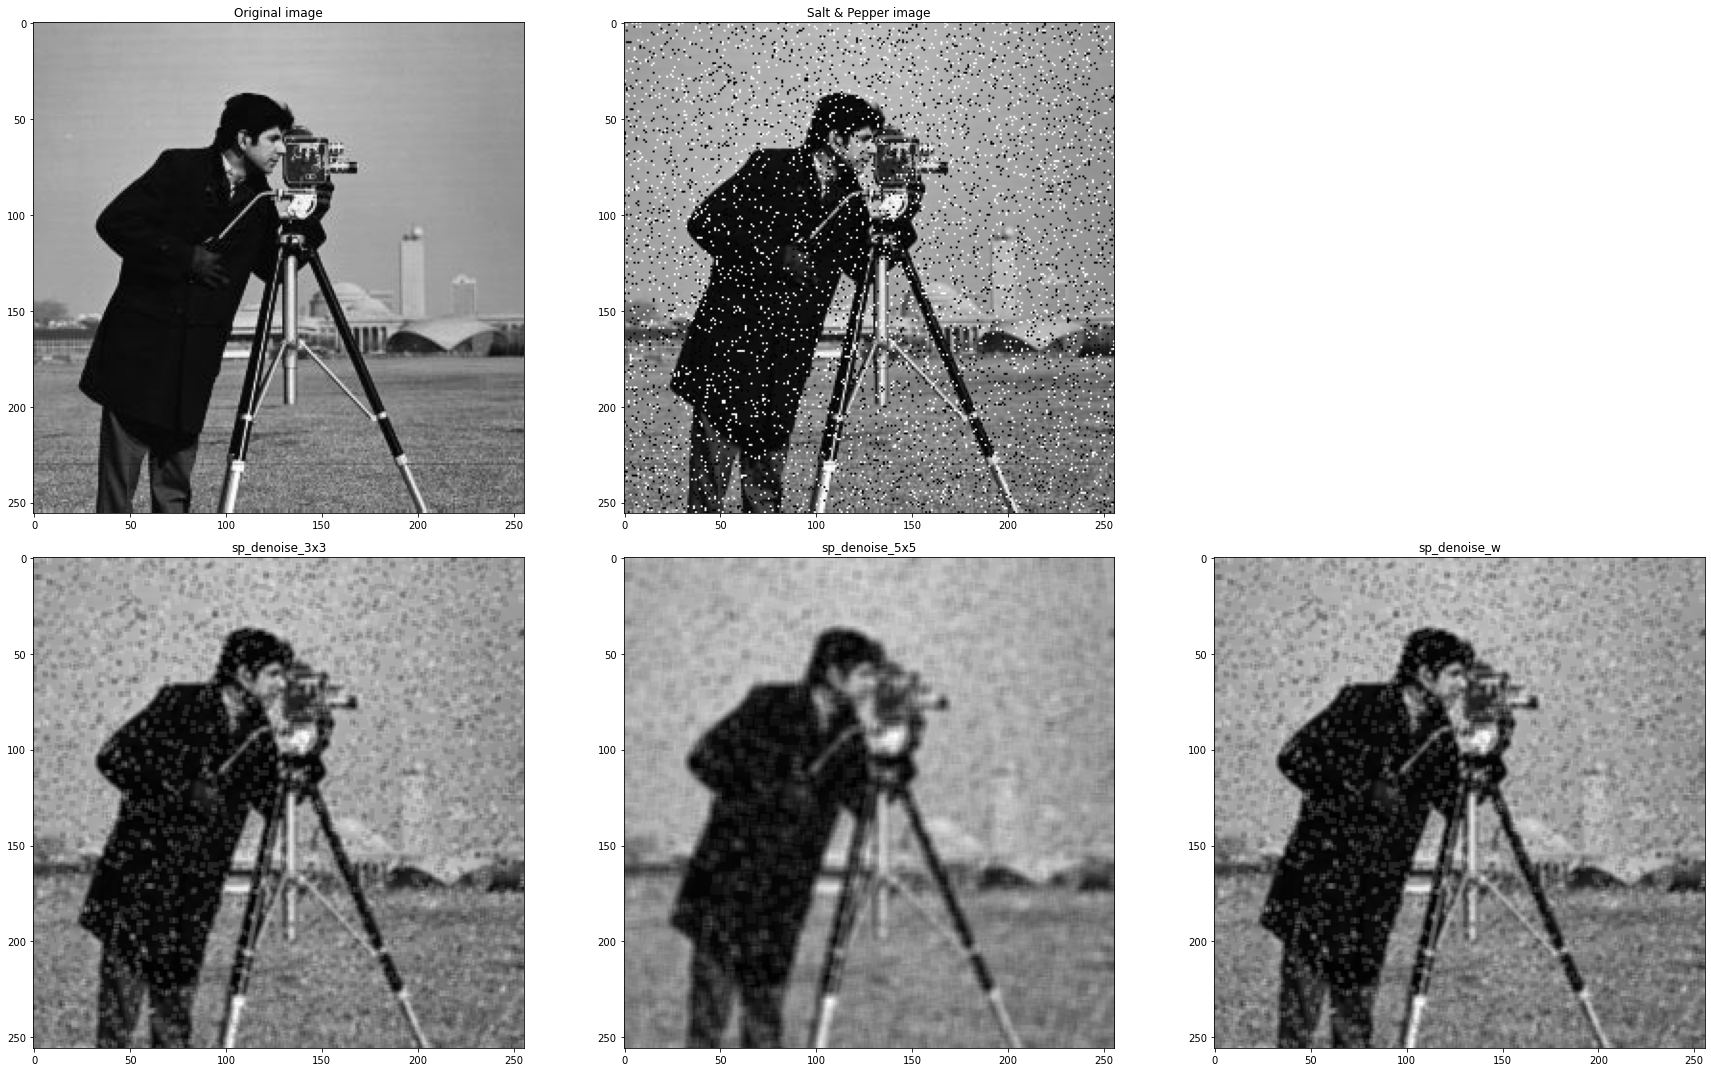

In [3]:

sp_denoise_3x3 = mean(sp_image, box_filter_3x3)
sp_denoise_5x5 = mean(sp_image, box_filter_5x5)
sp_denoise_w = mean(sp_image, weighted_avg)

sp_d_3x3_PSNR = peak_signal_noise_ratio(image_true=image, image_test=sp_denoise_3x3)
sp_d_5x5_PSNR = peak_signal_noise_ratio(image_true=image, image_test=sp_denoise_5x5)
sp_d_w_PSNR = peak_signal_noise_ratio(image_true=image, image_test=sp_denoise_w)

print(f"Salt & Pepper Denoise 3x3 PNSR:{sp_d_3x3_PSNR:.2f}")
print(f"Salt & Pepper Denoise 5x5 PNSR:{sp_d_5x5_PSNR:.2f}")
print(f"Salt & Pepper Denoise Weighted Average PNSR:{sp_d_w_PSNR:.2f}")

plt.figure(figsize=(25,15))
plt.subplot(2,3,1), plt.imshow(image, cmap="gray"), plt.title("Original image")
plt.subplot(2,3,2), plt.imshow(sp_image, cmap="gray"), plt.title("Salt & Pepper image")
plt.subplot(2,3,4), plt.imshow(sp_denoise_3x3, cmap="gray"), plt.title("sp_denoise_3x3")
plt.subplot(2,3,5), plt.imshow(sp_denoise_5x5, cmap="gray"), plt.title("sp_denoise_5x5")
plt.subplot(2,3,6), plt.imshow(sp_denoise_w, cmap="gray"), plt.title("sp_denoise_w")
plt.tight_layout()
plt.savefig('2-result-sp.jpg')
plt.show()